## Vaccination rate: 50% (Lägre än IDAHO)

In [51]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt

N = 100000
width = 140
height = 70
initial_infected = 1
vaccination_rate = 0.5
mortality_rate = 0.0021
timesteps = 100

model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

for t in range(timesteps):
    model.step()

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))

S: 15
I: 0
R: 98949
D: 1036


In [52]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()
model_df.head(10)

,Re,New Infected,Susceptible,Infected,Resistant,Dead,Total New Infected
0,0.000000,0,49826,1,50173,0,0
1,0.500000,1,49825,2,50173,0,1
2,0.777778,7,49819,9,50172,0,8
3,0.526316,10,49809,19,50172,0,18
4,0.457143,16,49793,35,50172,0,34
5,0.469697,31,49763,66,50171,0,65
6,0.472000,59,49705,125,50170,0,124
7,0.502008,125,49582,249,50168,1,249
8,0.415094,176,49416,424,50159,1,425
9,0.329073,206,49230,626,50143,1,631


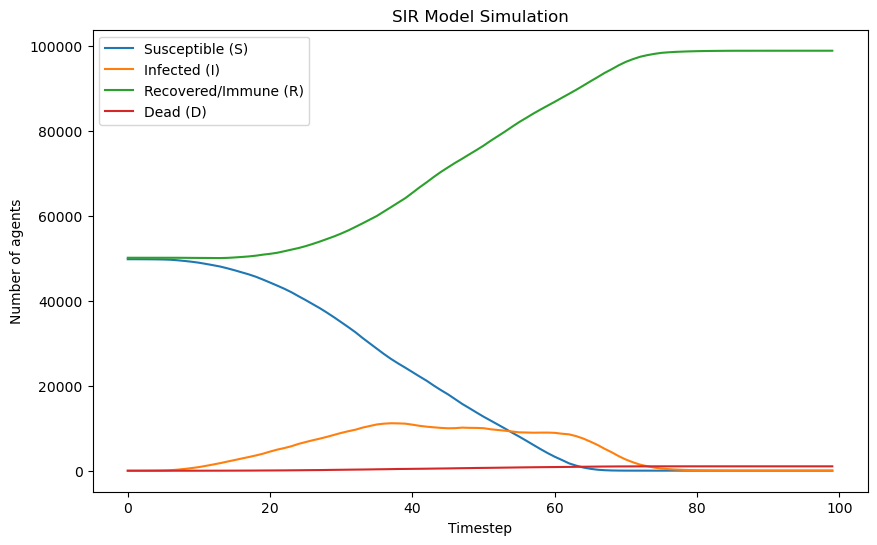

In [53]:

plt.figure(figsize=(10,6))
plt.plot(model_df["Susceptible"], label="Susceptible (S)")
plt.plot(model_df["Infected"], label="Infected (I)")
plt.plot(model_df["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()


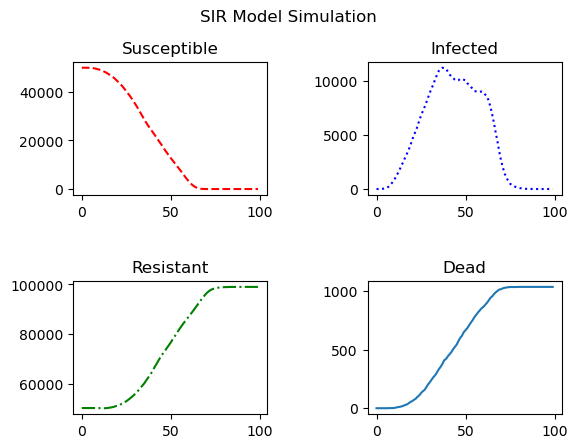

In [54]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [55]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
Re = sum(secondary.values()) / len(secondary) if secondary else 0 
print("Re =", Re)

# Tror detta kanske är mer sant?
print(model_df["Re"].mean())

Re = 1.9156137442113086
0.15538282809414622


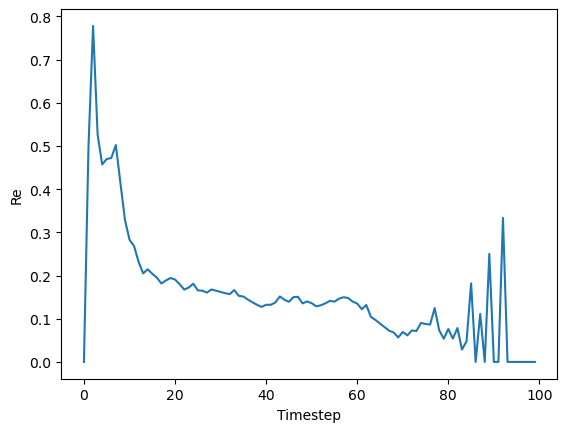

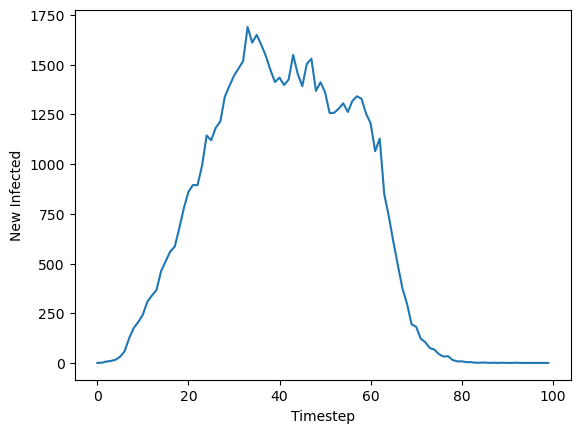

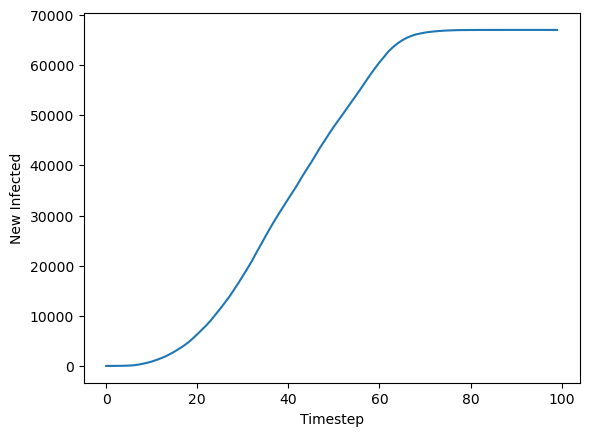

In [56]:
plt.plot(model_df["Re"])

plt.xlabel("Timestep")
plt.ylabel("Re")
plt.show()

plt.plot(model_df["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

## Vaccination rate: 78.% (IDAHO)

In [7]:
vaccination_rate_2 = 0.785

model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

for t in range(timesteps):
    model_2.step()

# Skriv ut resultat efter 1000 steg
print("S:", model_2.count_status("S"))
print("I:", model_2.count_status("I"))
print("R:", model_2.count_status("R"))
print("D:", model_2.count_status("D"))


S: 3554
I: 2532
R: 93468
D: 446


In [8]:
model_df_2 = model_2.datacollector.get_model_vars_dataframe()
agent_df_2 = model_2.datacollector.get_agent_vars_dataframe()

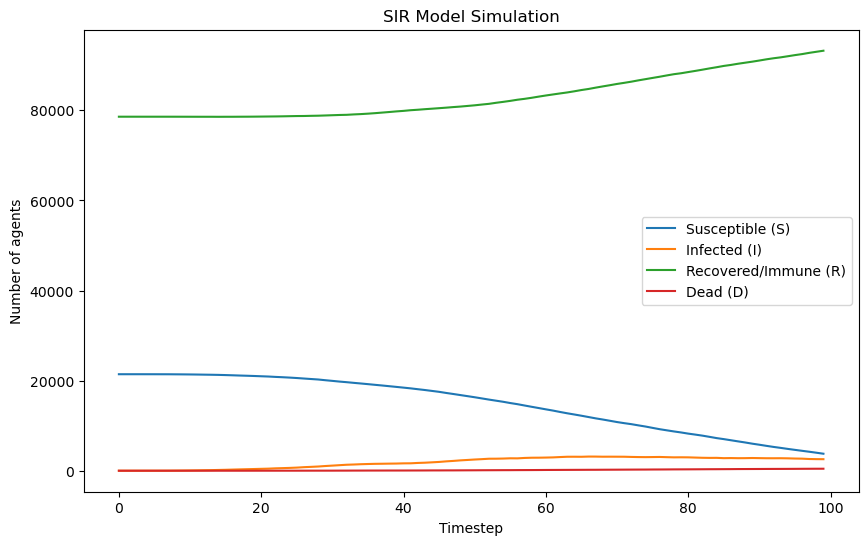

In [9]:
plt.figure(figsize=(10,6))
plt.plot(model_df_2["Susceptible"], label="Susceptible (S)")
plt.plot(model_df_2["Infected"], label="Infected (I)")
plt.plot(model_df_2["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df_2["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

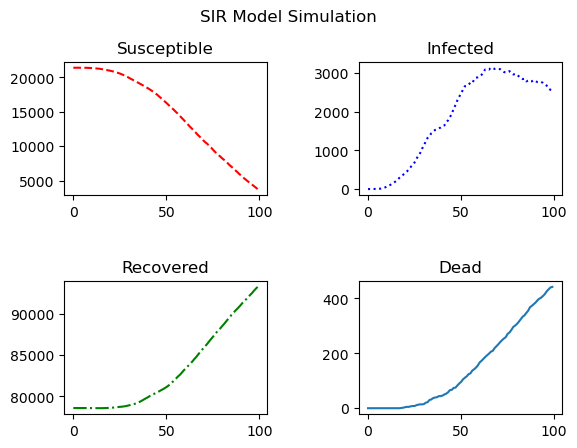

In [10]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df_2["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df_2["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df_2["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df_2["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

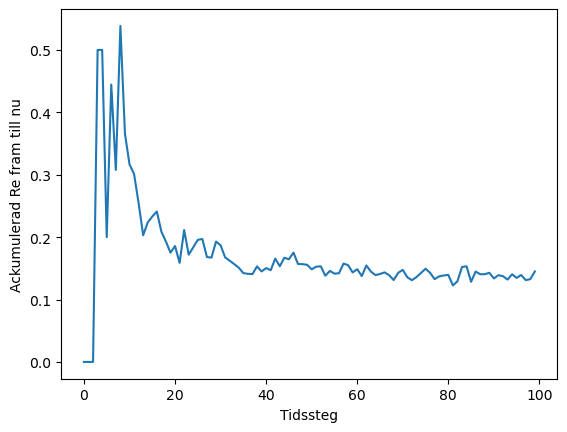

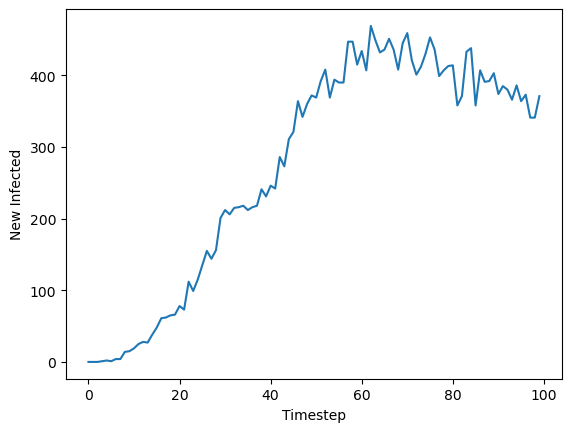

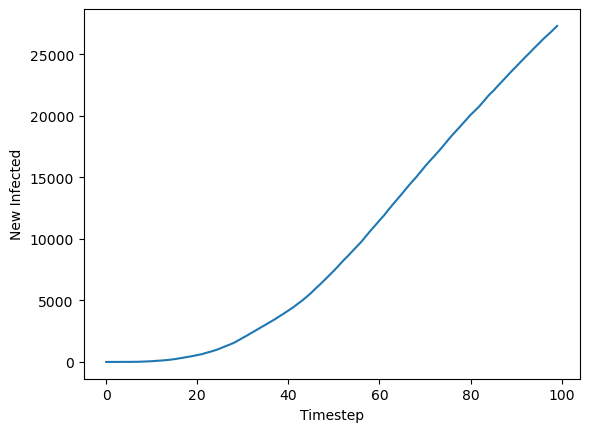

In [11]:
plt.plot(model_df_2["Re"])
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

plt.plot(model_df_2["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df_2["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

## Vaccination rate: 95 % (önskad vaccinationstäckning)

In [12]:
vaccination_rate_3 = 0.95

model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

for t in range(timesteps):
    model_3.step()

# Skriv ut resultat efter 1000 steg
print("S:", model_3.count_status("S"))
print("I:", model_3.count_status("I"))
print("R:", model_3.count_status("R"))
print("D:", model_3.count_status("D"))


S: 5035
I: 0
R: 94965
D: 0


In [13]:
model_df_3 = model_3.datacollector.get_model_vars_dataframe()
agent_df_3 = model_3.datacollector.get_agent_vars_dataframe()

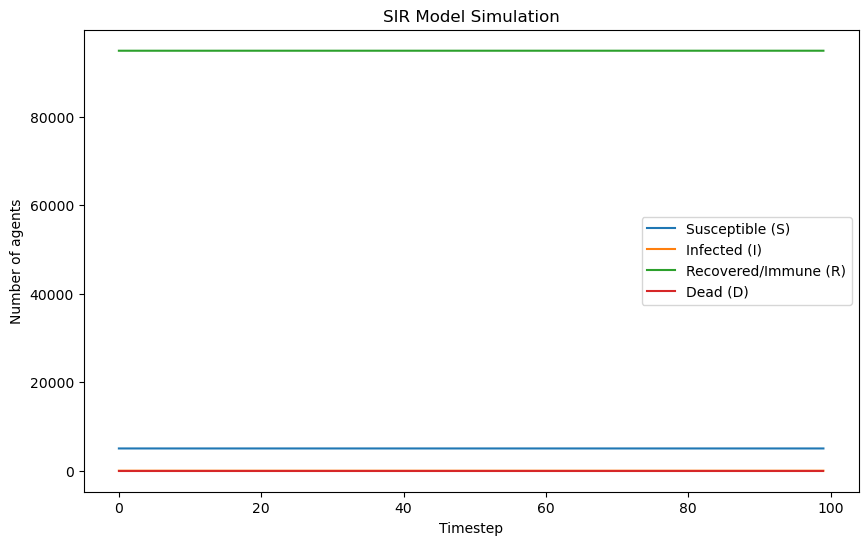

In [14]:
plt.figure(figsize=(10,6))
plt.plot(model_df_3["Susceptible"], label="Susceptible (S)")
plt.plot(model_df_3["Infected"], label="Infected (I)")
plt.plot(model_df_3["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df_3["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

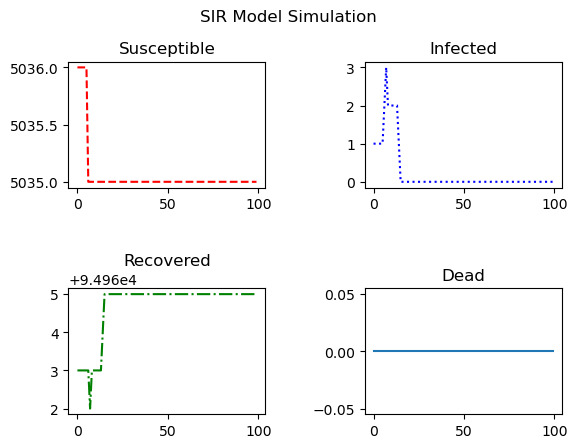

In [15]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df_3["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df_3["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df_3["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df_3["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

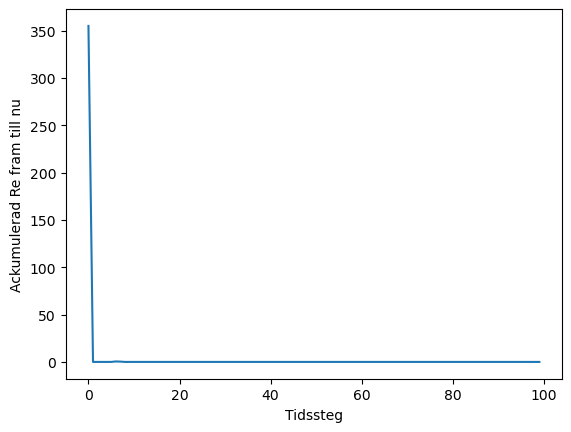

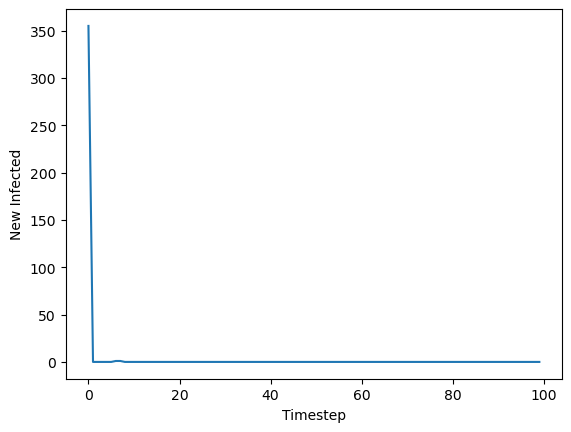

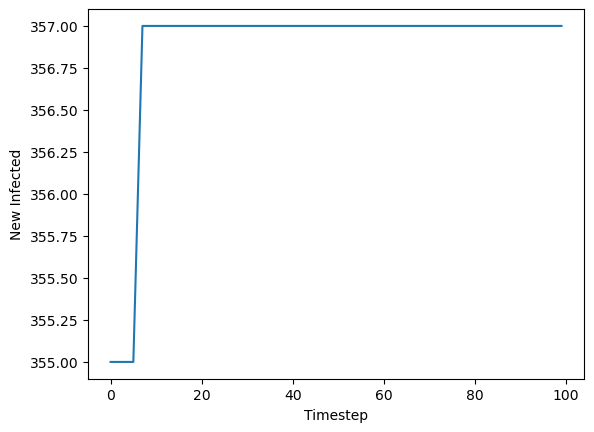

In [16]:
plt.plot(model_df_3["Re"])
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

plt.plot(model_df_3["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df_3["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()